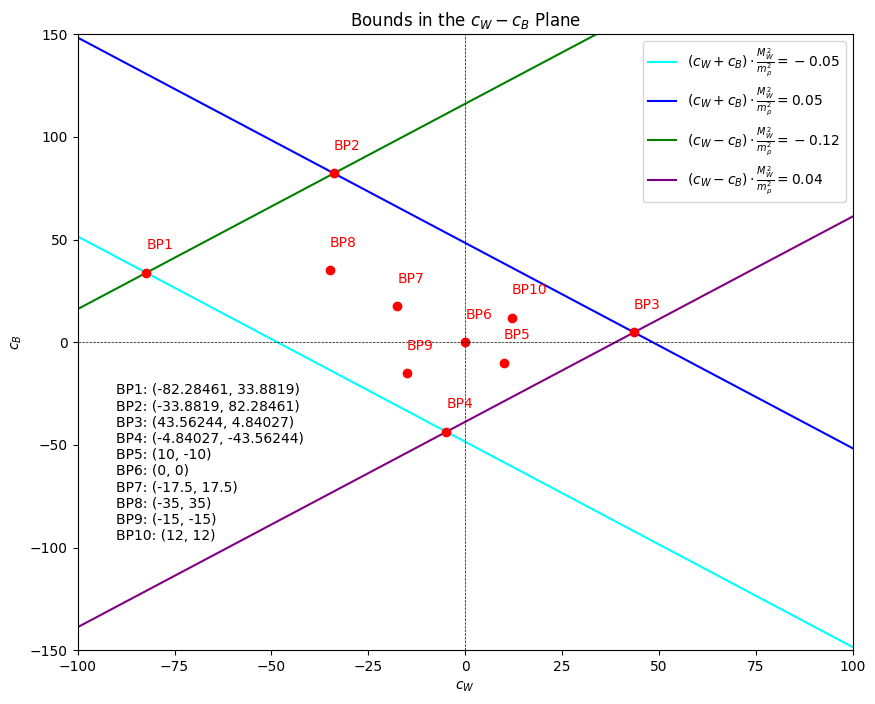

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Define the lines
def line1(cW):
    return -48.4177 - cW

def line2(cW):
    return 48.4177 - cW

def line3(cW):
    return cW + 116.175

def line4(cW):
    return cW - 38.725

# Calculate intersection points
def find_intersections():
    intersections = []
    
    # line1 and line2
    cW = np.linspace(-100, 100, 400)
    y1 = line1(cW)
    y2 = line2(cW)
    idx = np.argwhere(np.isclose(y1, y2, atol=1e-3)).flatten()
    intersections.extend([(cW[i], y1[i]) for i in idx])
    
    # line1 and line3
    idx = np.argwhere(np.isclose(y1, line3(cW), atol=1e-3)).flatten()
    intersections.extend([(cW[i], y1[i]) for i in idx])
    
    # line1 and line4
    idx = np.argwhere(np.isclose(y1, line4(cW), atol=1e-3)).flatten()
    intersections.extend([(cW[i], y1[i]) for i in idx])
    
    # line2 and line3
    idx = np.argwhere(np.isclose(y2, line3(cW), atol=1e-3)).flatten()
    intersections.extend([(cW[i], y2[i]) for i in idx])
    
    # line2 and line4
    idx = np.argwhere(np.isclose(y2, line4(cW), atol=1e-3)).flatten()
    intersections.extend([(cW[i], y2[i]) for i in idx])
    
    # line3 and line4
    idx = np.argwhere(np.isclose(line3(cW), line4(cW), atol=1e-3)).flatten()
    intersections.extend([(cW[i], line3(cW[i])) for i in idx])
    
    return intersections

# Get intersection points
intersections = find_intersections()

# Benchmark points
benchmark_points = {
    'BP1': (-82.28461, 33.8819),
    'BP2': (-33.8819, 82.28461),
    'BP3': (43.56244, 4.84027),
    'BP4': (-4.84027, -43.56244),
    'BP5': (10, -10),
    'BP6': (0, 0),
    'BP7': (-17.5, 17.5),
    'BP8': (-35, 35),
    'BP9': (-15, -15),  # New benchmark point
    'BP10': (12, 12)    # New benchmark point
}

# Prepare data for plotting
cW = np.linspace(-100, 100, 400)
plt.figure(figsize=(10, 8))
plt.plot(cW, line1(cW), label=r'$\left(c_W + c_B\right) \cdot \frac{M_W^2}{m_\rho^2} = -0.05$', color='cyan')
plt.plot(cW, line2(cW), label=r'$\left(c_W + c_B\right) \cdot \frac{M_W^2}{m_\rho^2} = 0.05$', color='blue')
plt.plot(cW, line3(cW), label=r'$\left(c_W - c_B\right) \cdot \frac{M_W^2}{m_\rho^2} = -0.12$', color='green')
plt.plot(cW, line4(cW), label=r'$\left(c_W - c_B\right) \cdot \frac{M_W^2}{m_\rho^2} = 0.04$', color='purple')

for x, y in intersections:
    plt.plot(x, y, 'ko', markersize=6)  # 'ko' is the color black for points
    # Annotate the points with an arrow and adjust the position
    plt.annotate(f'({x:.3f}, {y:.3f})', xy=(x, y), xytext=(x + 1800, y + 1600),  # Adjust the offsets here
                 fontsize=10, color='black', 
                 arrowprops=dict(arrowstyle='->', color='black', lw=1))

# Plot benchmark points with adjusted offsets
for label, (x, y) in benchmark_points.items():
    plt.plot(x, y, 'ro')  # 'ro' is the color red for benchmark points
    plt.text(x, y + 10, f'{label}', fontsize=10, verticalalignment='bottom', color='red')  # Adjusting the y offset here

# Add a box with benchmark point coordinates
box_text = "\n".join([f"{label}: {coords}" for label, coords in benchmark_points.items()])
plt.text(-90, -20, box_text, fontsize=10, verticalalignment='top', color='black')

# Customize plot
plt.xlim(-100, 100)
plt.ylim(-150, 150)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel(r'$c_W$')
plt.ylabel(r'$c_B$')
plt.title(r'Bounds in the $c_W - c_B$ Plane')
plt.grid(False)  # Turn off grid
plt.legend()
plt.savefig('cw_cb.pdf')
plt.show()
